In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import ny income file 
# The file was downloaded to my local so I then uploaded to repo to enable others in the team to run the notebook
demog_df = pd.read_csv('https://raw.githubusercontent.com/tawney-kirkland/Metis_Project_1/main/data/ny_income.csv',
                      usecols = ['GeoType', 'GeogName', 'GeoID', 'Borough','Pop16plE','F16plE','LFE','HH2E',
                       'HHI75t99E','HI100t149E','HI150t199E', 'HHI200plE', 'MdHHIncE', 'MnHHIncE', 
                        'InfoE', 'FIREE', 'PrfSMgAWME','EdHlthCSAE','PubAdminE'])

In [4]:
demog_df.rename(columns = {'Pop16plE': 'above_16_pop',
                            'F16plE' : 'fem_above_16_pop',
                           'LFE' : 'labor_force',
                            'HH2E' : 'total_households',
                           'HHI75t99E' : 'income_75_99k',
                           'HI100t149E' : 'income_100_149k',
                            'HI150t199E' : 'income_150_199k',
                            'HHI200plE': 'income_200k_over',
                           'MdHHIncE': 'income_median',
                           'MnHHIncE': 'income_mean',
                            'InfoE': 'information_occ',
                            'FIREE': 'finServ_occ', 
                            'PrfSMgAWME': 'profesServ_occ',
                            'EdHlthCSAE': 'edhealth_occ',
                            'PubAdminE': 'pubAdmin_occ'},
                           
                 inplace=True
                )

In [5]:
demog_df.head()

,GeoType,GeogName,GeoID,Borough,above_16_pop,labor_force,fem_above_16_pop,information_occ,finServ_occ,profesServ_occ,edhealth_occ,pubAdmin_occ,total_households,income_75_99k,income_100_149k,income_150_199k,income_200k_over,income_median,income_mean
0,NTA2010,Bath Beach,BK27,Brooklyn,26855,16006,13703,401,1392,1482,4053,571,11428,1352,1758,706,585,58243.0,75950.0
1,NTA2010,Bay Ridge,BK31,Brooklyn,65479,42176,34372,1464,4463,5179,10126,2341,33487,4108,4827,2497,2775,63539.0,86319.0
2,NTA2010,Bedford,BK75,Brooklyn,54904,36993,29640,1688,2303,4217,9005,1062,26059,2269,2847,1195,1034,39970.0,62616.0
3,NTA2010,Bensonhurst East,BK29,Brooklyn,52857,32004,27592,580,2136,2828,7677,756,22187,2558,2416,1144,844,48097.0,65715.0
4,NTA2010,Bensonhurst West,BK28,Brooklyn,74470,45842,38579,958,3573,4223,10021,1161,29909,3428,3743,1649,1231,51035.0,70198.0


In [6]:
#Calculate the female population in each area
demog_df['fem_pop_percent'] = demog_df['fem_above_16_pop'] / demog_df['above_16_pop'] 

In [23]:
# Calculate percent in particular industries
demog_df['inform_occ_percent'] = demog_df['information_occ'] / demog_df['labor_force'] 
demog_df['finServ_occ_percent'] = demog_df['finServ_occ'] / demog_df['labor_force'] 
demog_df['profesServ_occ_percent'] = demog_df['profesServ_occ'] / demog_df['labor_force'] 
demog_df['edhealth_occ_percent'] = demog_df['edhealth_occ'] / demog_df['labor_force'] 
demog_df['pubAdmin_occ_percent'] = demog_df['pubAdmin_occ'] / demog_df['labor_force'] 

In [24]:
# Calculate the percent of households in each area within the specified income ranges
demog_df['percent_75_99k'] = demog_df['income_75_99k'] / demog_df['total_households'] 
demog_df['percent_100_149k'] = demog_df['income_100_149k'] / demog_df['total_households'] 
demog_df['percent_150_199k'] = demog_df['income_150_199k'] / demog_df['total_households']
demog_df['percent_200_over'] = demog_df['income_200k_over'] / demog_df['total_households']

# Sum percent of households with more than 100k / 150k income to determine a thresh hold
demog_df['percent_above_100k'] = demog_df['percent_100_149k'] + demog_df['percent_150_199k'] + demog_df['percent_200_over']
demog_df['percent_above_150k'] = demog_df['percent_150_199k'] + demog_df['percent_200_over']

In [25]:
# Drop unnecessary columns
demog_short = demog_df.drop(columns=
                            ['information_occ','finServ_occ','profesServ_occ',
                             'edhealth_occ','pubAdmin_occ','income_75_99k',
                             'income_100_149k','income_150_199k','income_200k_over',
                             'income_mean','income_median','percent_75_99k'])

In [26]:
gramercy_df = demog_short[demog_short['GeogName'] == 'Gramercy']
prospectH_df = demog_short[demog_short['GeogName'] == 'Prospect Heights']
brooklynH_df = demog_short[demog_short['GeogName'] == 'Brooklyn Heights-Cobble Hill']
flushing_df = demog_short[demog_short['GeogName'] == 'Flushing']
concourse_df = demog_short[demog_short['GeogName'] == 'East Concourse-Concourse Village']
union_df = demog_short[demog_short['GeogName'] == 'Hudson Yards-Chelsea-Flat Iron-Union Square']

In [27]:
# New DF containing only neighborhoods of interest
merged_df = gramercy_df.append([union_df, prospectH_df,brooklynH_df,flushing_df, concourse_df])
merged_df

,GeoType,GeogName,GeoID,Borough,above_16_pop,labor_force,fem_above_16_pop,total_households,fem_pop_percent,percent_100_149k,percent_150_199k,percent_200_over,percent_above_100k,percent_above_150k,inform_occ_percent,finServ_occ_percent,profesServ_occ_percent,edhealth_occ_percent,pubAdmin_occ_percent
59,NTA2010,Gramercy,MN21,Manhattan,26343,19817,14560,14167,0.552708,0.186843,0.116468,0.265264,0.568575,0.381732,0.110612,0.208760,0.221779,0.155725,0.011152
61,NTA2010,Hudson Yards-Chelsea-Flat Iron-Union Square,MN13,Manhattan,69699,53890,33336,42124,0.478285,0.159695,0.099658,0.275401,0.534755,0.375059,0.083355,0.205084,0.223214,0.143756,0.023808
39,NTA2010,Prospect Heights,BK64,Brooklyn,17456,13431,9125,9331,0.522743,0.190226,0.106634,0.155503,0.452363,0.262137,0.109374,0.082942,0.205346,0.233713,0.038716
7,NTA2010,Brooklyn Heights-Cobble Hill,BK09,Brooklyn,21110,14418,10684,11152,0.506111,0.180506,0.119171,0.262285,0.561962,0.381456,0.092593,0.169233,0.277362,0.190110,0.026772
97,NTA2010,Flushing,QN22,Queens,60539,34430,32723,25807,0.540528,0.084589,0.034526,0.019801,0.138916,0.054326,0.012896,0.083997,0.090415,0.168109,0.016294
164,NTA2010,East Concourse-Concourse Village,BX14,The Bronx,49034,27811,27159,22180,0.553881,0.051262,0.009468,0.010370,0.071100,0.019838,0.011219,0.059689,0.078063,0.280465,0.029665


In [28]:
mean_fem = demog_short['fem_pop_percent'].mean()
mean_info = demog_short['inform_occ_percent'].mean()
mean_above_100k = demog_short['percent_above_100k'].mean()
mean_above_150k = demog_short['percent_above_150k'].mean()

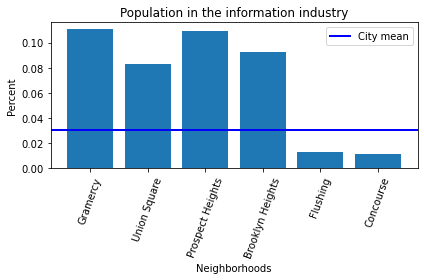

In [29]:
ticks_x = ['Gramercy', 'Union Square','Prospect Heights', 'Brooklyn Heights', 'Flushing','Concourse']
spacing = np.linspace(0,5,6)
plt.bar(merged_df['GeogName'],merged_df['inform_occ_percent'])
plt.xticks(spacing, ticks_x, rotation=70)
plt.axhline(mean_info, label= 'City mean', color = 'blue', linewidth=2)
plt.title('Population in the information industry')
plt.xlabel('Neighborhoods')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.tight_layout()
plt.show;
plt.savefig("information_ind_new.svg")

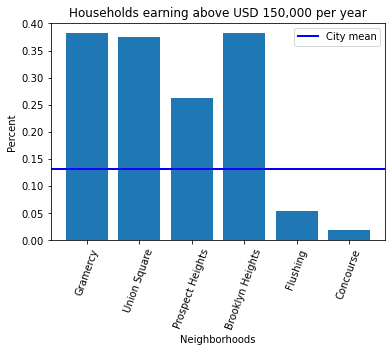

In [30]:
ticks_x2 = ['Gramercy', 'Union Square','Prospect Heights', 'Brooklyn Heights', 'Flushing','Concourse']
spacing = np.linspace(0,5,6)
plt.bar(merged_df['GeogName'],merged_df['percent_above_150k'])
plt.xticks(spacing, ticks_x, rotation=70)
plt.axhline(mean_above_150k, label= 'City mean', color = 'blue', linewidth=2)
plt.title('Households earning above USD 150,000 per year')
plt.xlabel('Neighborhoods')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.show;
plt.savefig("hhincome.svg")

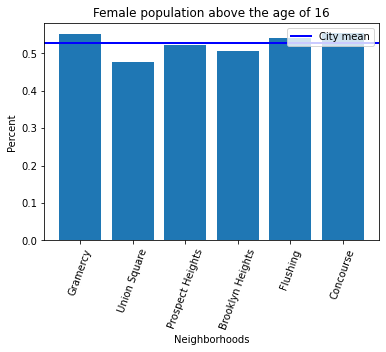

In [31]:
ticks_x2 = ['Gramercy', 'Union Square','Prospect Heights', 'Brooklyn Heights', 'Flushing','Concourse']
spacing = np.linspace(0,5,6)
plt.bar(merged_df['GeogName'],merged_df['fem_pop_percent'])
plt.xticks(spacing, ticks_x, rotation=70)
plt.axhline(mean_fem, label= 'City mean', color = 'blue', linewidth=2)
plt.title('Female population above the age of 16')
plt.xlabel('Neighborhoods')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.show;
plt.savefig("fempop.svg")